# Comparison of BioLector and liter-scale bioreactor

### Imports and data loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import arviz
import calibr8
from matplotlib import cm, pyplot
import numpy
import os
import pathlib
import string
try:
    import pymc as pymc3
except:
    import pymc3

import cutisplit

import run_analysis


print(f"pymc {pymc3.__version__}")
print(f"calibr8 {calibr8.__version__}")

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


pymc 4.0.0b2
calibr8 6.5.2


In [3]:
RUN_ID = "CB4MNH" # run without position effect (after experimental correction)
resultpath = f'{RUN_ID}_Results' 

parent_dir = pathlib.Path(os.getcwd()).parent
df_inputs, df_kinetics = run_analysis.read_rounds(["BWNZ99", "BZP1XQ", "C4PZHQ"]) # round 1 and round 2 of PE-H

Error while reading the files. Repetition 3 does not exist and loop will be exited
Error while reading the files. Repetition 3 does not exist and loop will be exited
Error while reading the files. Repetition 3 does not exist and loop will be exited


# Load data from different rounds

In [4]:
idata_before =  arviz.from_netcdf(
    rf"{parent_dir}\data_analysis\C4PZHQ_Results\C4PZHQ_PE-H_round2.nc"
)
idata_after = arviz.from_netcdf(
    rf"{parent_dir}\data_analysis\{resultpath}\{RUN_ID}_assay-effect.nc"
)

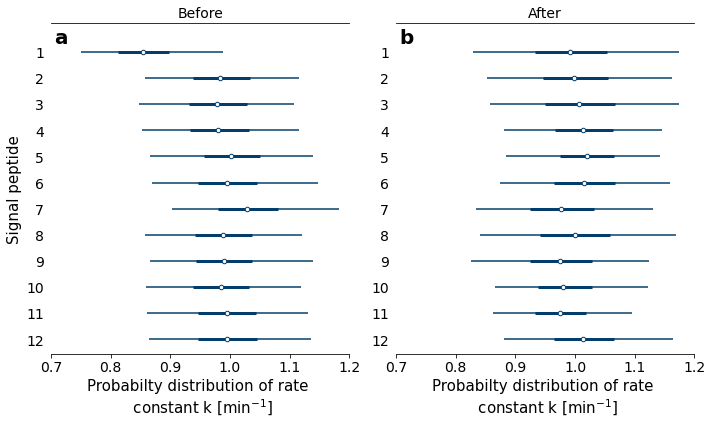

In [5]:
fig, axs = pyplot.subplots(figsize=(10,6), ncols=2)
for i, (idat, ax) in enumerate(zip([idata_before, idata_after], axs.flatten())):
    arviz.plot_forest(idat, var_names=["assay_effect"], combined=True, ax=ax, colors=["#023D6B"])
    ax.set_xlabel("Probabilty distribution of rate \n constant k [min$^{-1}$]", size=15)
    strains = numpy.unique([
        strain[:-2]
        for strain in df_inputs.strain.values
])
    ax.set_yticklabels(numpy.arange(1,13)[::-1])
    ax.set_xlim(0.7, 1.2)
    ax.text(0.01, 0.94, string.ascii_lowercase[i], transform=ax.transAxes, 
            size=20, weight='bold')
axs[0].set_title(f"Before", size=14)
axs[1].set_title(f"After", size=14)
axs[0].set_ylabel("Signal peptide", size=15)
pyplot.tight_layout()
pyplot.savefig("Assay_effect.png", dpi=200)